# Exercise 3
### Anton Wiehe & Angelie Kraft

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Test image
im_frame = Image.open("positives/" + 'p01.png')
np_frame = np.array(im_frame.getdata())
print(len(np_frame))

# Load images (30, 573, 3) == (num_images, num_pixels, rgb)
positives = np.zeros((30, 576, 3))
for i in range(30):
    im_frame = Image.open("positives/" + 'p' + ('0' if (i+1) < 10 else '') + str(i + 1) + '.png')
    positives[i] = np.array(im_frame.getdata())
    
negatives = np.zeros((30, 576, 3))
for i in range(30):
    im_frame = Image.open("negatives/" + 'n' + ('0' if (i+1) < 10 else '') + str(i + 1) + '.png')
    negatives[i] = np.array(im_frame.getdata())
    

576


In [15]:
# get means of RGB values for each image: one tuple of three values per image
def get_RGB_means(images):
    means = np.zeros((30,3))
    for i,img in enumerate(images):
        means[i] = np.mean(img, axis=0)
    return means

In [16]:
RGB_means_pos = get_RGB_means(positives)
RGB_means_neg = get_RGB_means(negatives)

([array([0., 1., 1., 6., 9., 6., 4., 2., 1., 0.]),
  array([0., 0., 0., 0., 2., 4., 8., 8., 4., 4.]),
  array([15.,  6.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([ 6.93501769,  9.42235523, 11.90969276, 14.3970303 , 16.88436783,
        19.37170537, 21.85904291, 24.34638044, 26.83371798, 29.32105552,
        31.80839305]),
 <a list of 3 Lists of Patches objects>)

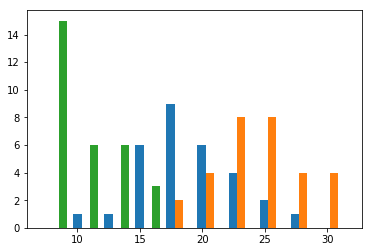

In [27]:
plt.hist(RGB_stds_pos)

([array([11.,  3.,  9.,  2.,  3.,  1.,  1.,  0.,  0.,  0.]),
  array([7., 8., 6., 2., 2., 2., 2., 0., 0., 1.]),
  array([ 9., 10.,  6.,  1.,  2.,  2.,  0.,  0.,  0.,  0.])],
 array([ 4.77345447,  6.78713262,  8.80081077, 10.81448892, 12.82816708,
        14.84184523, 16.85552338, 18.86920153, 20.88287968, 22.89655783,
        24.91023598]),
 <a list of 3 Lists of Patches objects>)

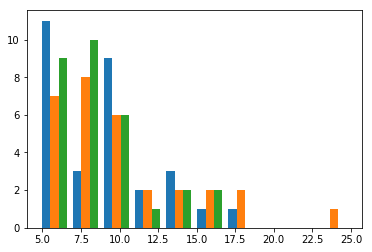

In [26]:
plt.hist(RGB_stds_neg)

In [32]:
RGB_overall_means_pos = np.mean(RGB_means_pos, axis=1)
RGB_overall_means_neg = np.mean(RGB_means_neg, axis=1)

In [33]:
RGB_overall_means_neg

array([121.66493056, 131.75868056, 115.63657407, 145.50115741,
       147.31423611, 137.17881944, 131.77372685, 162.9068287 ,
       153.06597222, 141.48611111, 162.4537037 , 137.41956019,
       125.13252315, 170.23321759, 125.22337963, 146.71238426,
       134.10358796, 136.96469907, 129.76793981, 139.33796296,
       121.18634259, 116.16550926, 162.94791667, 136.44791667,
       129.54803241, 138.4681713 , 132.69733796, 117.52662037,
       154.89467593, 173.30671296])

In [34]:
def get_RGB_stds(images):
    stds = np.zeros((30,3))
    for i,img in enumerate(images):
        stds[i] = np.std(img, axis=0)
    return stds

In [35]:
RGB_stds_pos = get_RGB_stds(positives)
RGB_stds_neg = get_RGB_stds(negatives)

([array([0., 1., 1., 6., 9., 6., 4., 2., 1., 0.]),
  array([0., 0., 0., 0., 2., 4., 8., 8., 4., 4.]),
  array([15.,  6.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([ 6.93501769,  9.42235523, 11.90969276, 14.3970303 , 16.88436783,
        19.37170537, 21.85904291, 24.34638044, 26.83371798, 29.32105552,
        31.80839305]),
 <a list of 3 Lists of Patches objects>)

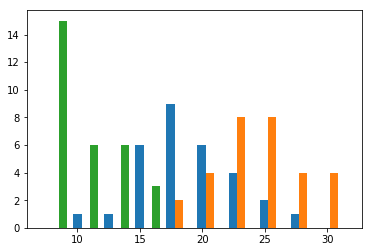

In [36]:
plt.hist(RGB_stds_pos)

([array([11.,  3.,  9.,  2.,  3.,  1.,  1.,  0.,  0.,  0.]),
  array([7., 8., 6., 2., 2., 2., 2., 0., 0., 1.]),
  array([ 9., 10.,  6.,  1.,  2.,  2.,  0.,  0.,  0.,  0.])],
 array([ 4.77345447,  6.78713262,  8.80081077, 10.81448892, 12.82816708,
        14.84184523, 16.85552338, 18.86920153, 20.88287968, 22.89655783,
        24.91023598]),
 <a list of 3 Lists of Patches objects>)

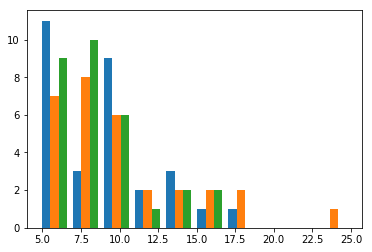

In [37]:
plt.hist(RGB_stds_neg)

In [38]:
# We now have sample images (positive and negative) represented by 7-tuples:
# [mean R, mean G, mean B, mean of RGB means, std of R, std of G, std of B]
samples_pos = np.column_stack((RGB_means_pos,RGB_overall_means_pos,RGB_stds_pos))
samples_neg = np.column_stack((RGB_means_neg,RGB_overall_means_neg,RGB_stds_neg))

In [39]:
def calc_mu(samples):
    return np.sum(samples, axis=0) / len(samples)

mu_pos = calc_mu(samples_pos)
mu_neg = calc_mu(samples_neg)

In [47]:
print("Pos:", mu_pos, "\n\nNeg:", mu_neg)

Pos: [176.17256944 139.52424769 142.91741898 152.87141204  19.38541321
  24.84986984  10.50157667] 

Neg: [163.71302083 126.82800926 127.34149306 139.29417438   9.15690078
   9.9563192    8.52678672]


In [48]:
def calc_Sigma(samples):
    diff = np.array([x - mu_pos for x in samples])
    Sigma = []
    for i,feature in enumerate(diff.T):
        Sigma.append(feature @ diff.T[i]/len(diff))
    return diff, Sigma

diff_pos,Sigma_pos = calc_Sigma(samples_pos)
diff_neg,Sigma_neg = calc_Sigma(samples_neg)

In [49]:
p_x_pos = (1/((2*np.pi)**(7/2))*np.sqrt(np.linalg.det(Sigma_pos)))**(np.matmul(diff_pos, np.transpose(diff_pos))/2*Sigma_pos**(-1))

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [ ]:
plt.plot(p_x_pos)